In [6]:
import numpy as np
import pandas as pd
n_samples = 1000
np.random.seed(42)
X_numeric = np.random.rand(n_samples, 2)

# Categorical feature
categories = ['A', 'B', 'C', 'D']
X_categorical = np.random.choice(categories, n_samples)

# Encode categorical feature for simulation (not for model training yet)
category_map = {'A': 1, 'B': 2, 'C': 3, 'D': 4}
X_categorical_encoded = np.array([category_map[cat] for cat in X_categorical])

# Combine features and simulate a target variable
# Target = 2*Feature1 + 3*Feature2 + 5*Category_encoded + noise
noise = np.random.randn(n_samples) * 2
target = 2 * X_numeric[:, 0] + 3 * X_numeric[:, 1] + 5 * X_categorical_encoded + noise

# 2. Create a Pandas DataFrame
data = {
    'Feature1': X_numeric[:, 0],
    'Feature2': X_numeric[:, 1],
    'Category': X_categorical,
    'Target': target
}
df = pd.DataFrame(data)

# 3. Display the first 5 rows of the DataFrame
print("First 5 rows of the DataFrame:")
print(df.head())

# 4. Print a concise summary of the DataFrame
print("\nConcise summary of the DataFrame:")
df.info()

First 5 rows of the DataFrame:
   Feature1  Feature2 Category     Target
0  3.745401  9.507143        D  57.054476
1  7.319939  5.986585        C  48.890065
2  1.560186  1.559945        C  23.911417
3  0.580836  8.661761        C  42.326118
4  6.011150  7.080726        D  52.869801

Concise summary of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  1000 non-null   float64
 1   Feature2  1000 non-null   float64
 2   Category  1000 non-null   object 
 3   Target    1000 non-null   float64
dtypes: float64(3), object(1)
memory usage: 31.4+ KB


In [8]:
import pandas as pd
df_encoded = pd.get_dummies(df, columns=['Category'], drop_first=True, prefix='Category')
print("First 5 rows of the DataFrame after one-hot encoding:")
print(df_encoded.head())
print("\nConcise summary of the DataFrame after one-hot encoding:")
df_encoded.info()

First 5 rows of the DataFrame after one-hot encoding:
   Feature1  Feature2     Target  Category_B  Category_C  Category_D
0  3.745401  9.507143  57.054476       False       False        True
1  7.319939  5.986585  48.890065       False        True       False
2  1.560186  1.559945  23.911417       False        True       False
3  0.580836  8.661761  42.326118       False        True       False
4  6.011150  7.080726  52.869801       False       False        True

Concise summary of the DataFrame after one-hot encoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Feature1    1000 non-null   float64
 1   Feature2    1000 non-null   float64
 2   Target      1000 non-null   float64
 3   Category_B  1000 non-null   bool   
 4   Category_C  1000 non-null   bool   
 5   Category_D  1000 non-null   bool   
dtypes: bool(3), float64(3)
memory usage:

In [3]:
import pandas as pd

# 1. Separate features (X) from the target variable (y)
X = df_encoded.drop('Target', axis=1)
y = df_encoded['Target']

print("Features (X) head:")
print(X.head())
print("\nTarget (y) head:")
print(y.head())

Features (X) head:
   Feature1  Feature2  Category_B  Category_C  Category_D
0  3.745401  9.507143       False       False        True
1  7.319939  5.986585       False        True       False
2  1.560186  1.559945       False        True       False
3  0.580836  8.661761       False        True       False
4  6.011150  7.080726       False       False        True

Target (y) head:
0    57.054476
1    48.890065
2    23.911417
3    42.326118
4    52.869801
Name: Target, dtype: float64


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 2. Split the X and y data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# 3. Import the LinearRegression class from sklearn.linear_model (already done above)

# 4. Instantiate a LinearRegression model
model = LinearRegression()

# 5. Train the LinearRegression model using the X_train and y_train datasets
model.fit(X_train, y_train)

print("\nLinear Regression model trained.")

# 6. Use the trained model to make predictions on the X_test data
y_pred = model.predict(X_test)

print("Predictions made on X_test.")


X_train shape: (800, 5)
X_test shape: (200, 5)
y_train shape: (800,)
y_test shape: (200,)

Linear Regression model trained.
Predictions made on X_test.


In [5]:
import pandas as pd

# 1. Access the trained model's coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# 2. Create a Pandas Series to store the coefficients, using the column names of X_train as the index
coefficients_series = pd.Series(coefficients, index=X_train.columns)

# 3. Print the intercept and the coefficients
print("Model Intercept:", intercept)
print("\nModel Coefficients:")
print(coefficients_series)


Model Intercept: 5.141239701083919

Model Coefficients:
Feature1       1.998628
Feature2       3.008952
Category_B     4.787793
Category_C     9.786853
Category_D    14.784489
dtype: float64


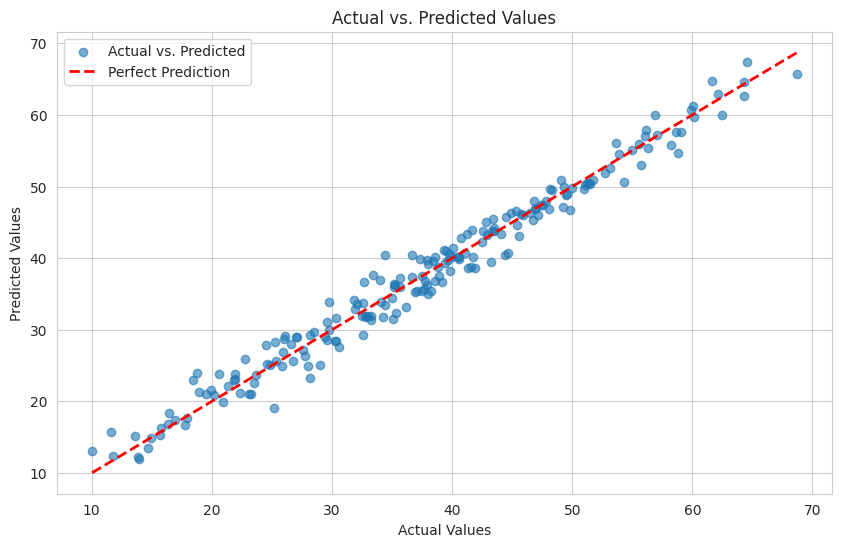

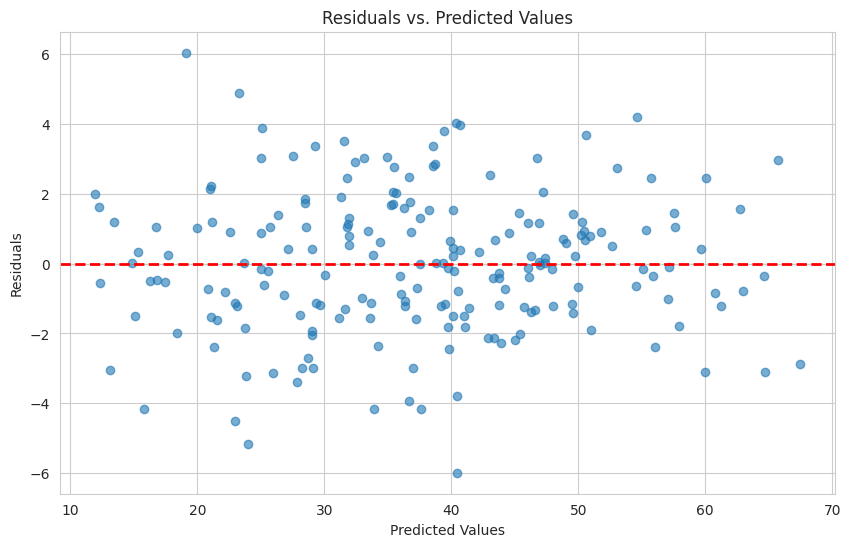

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for the plots for better aesthetics
sns.set_style("whitegrid")

# 1. Plot Actual vs. Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

# 2. Plot Residuals vs. Predicted Values
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()